# Figure 1 Trend of the number of monitoring sites and samples in the Soil Quality Monitoring Programme  between 2020 and 2025

In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
import numpy as np

import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 300
mpl.rcParams["savefig.dpi"] = 300

In [7]:
# -------------------------
# Data (2020–2025)
# -------------------------
years = [2020, 2021, 2022, 2023, 2024, 2025]

data = {
    "Residential": {
        "sites":   [69, 81, 81, 150, 150, 150],
        "samples": [149, 170, 170, 314, 314, 157],
    },
    "Industrial": {
        "sites":   [116, 169, 169, 169, 169, 169],
        "samples": [240, 356, 354, 354, 354, 177],
    },
    "Agriculture": {
        "sites":   [100, 100, 310, 306, 306, 306],
        "samples": [210, 210, 650, 642, 642, 321],
    },
    "Non-developed": {
        "sites":   [0, 15, 0, 75, 0, 84],
        "samples": [0, 32, 0, 158, 0, 88],
    },
}

# Panel colors: (sites_front_light, samples_back_dark)
colors = {
    "Residential":    ("#C7DDE2", "#3F8D9B"),
    "Industrial":     ("#F3C7B7", "#D96A3A"),
    "Agriculture":    ("#CBE7C2", "#67B85A"),
    "Non-developed":  ("#C9CDC7", "#4F5B49"),
}

BG_PILL = "#EEEEEE"

In [8]:
def pill(ax, x_center, y0, height, width, color, alpha=1.0, z=1):
    """Rounded-rect (pill) patch in data coordinates."""
    if height <= 0:
        return
    x0 = x_center - width / 2
    r = width / 2
    patch = FancyBboxPatch(
        (x0, y0), width, height,
        boxstyle=f"round,pad=0,rounding_size={r}",
        linewidth=0,
        facecolor=color,
        alpha=alpha,
        zorder=z
    )
    ax.add_patch(patch)


def draw_panel(ax, title, years, sites, samples, site_color, sample_color):
    years = list(years)
    sites = np.array(sites, dtype=float)
    samples = np.array(samples, dtype=float)

    max_v = max(float(samples.max()), float(sites.max()), 1.0)
    full_h = max_v * 1.15  # background pillar height

    x = np.arange(len(years))
    w_back = 0.56  # samples width (back)
    w_front = 0.50 # sites width (front)

    # background gray pills (same height)
    for xi in x:
        pill(ax, xi, 0, full_h, w_back, BG_PILL, alpha=1.0, z=0)

    for xi, s_site, s_samp in zip(x, sites, samples):
        # back: samples
        pill(ax, xi, 0, s_samp, w_back, sample_color, alpha=0.90, z=2)
        # front: sites
        pill(ax, xi, 0, s_site, w_front, site_color, alpha=1.0, z=3)

        # ---- labels ----
        # sites label inside front bar
        if s_site > 0:
            y_site = max(s_site * 0.5, full_h * 0.04)
            ax.text(
                xi, y_site, f"{int(s_site)}",
                ha="center", va="center",
                fontsize=10, color="white", zorder=10
            )

        # samples label: try to place above sites so it won't be covered
        if s_samp > 0:
            if s_samp > s_site:
                y_samp = s_site + (s_samp - s_site) * 0.5
            else:
                y_samp = s_samp * 0.5
            ax.text(
                xi, y_samp, f"{int(s_samp)}",
                ha="center", va="center",
                fontsize=10, color="white", zorder=9
            )

    # styling
    ax.text(
        -0.25, 0.7, title,
        transform=ax.transAxes,
        fontsize=16,
        fontweight="bold",
        color=sample_color,
        ha="left",
        va="bottom"
    )
    ax.set_xticks(x)
    ax.set_xticklabels(years, fontsize=10, color="#777777")
    ax.set_xlim(-0.8, len(years) - 0.2)
    ax.set_ylim(0, full_h)
    ax.spines[:].set_visible(False)
    ax.tick_params(axis="y", left=False, labelleft=False)
    ax.grid(False)

    # legend
    ax.scatter([], [], s=120, color=site_color, label="No. of Sites")
    ax.scatter([], [], s=120, color=sample_color, label="No. of Samples")
    leg = ax.legend(
        loc="lower left",
        bbox_to_anchor=(-0.25, 0.02),
        frameon=False,
        fontsize=10,
        handletextpad=0.6
    )
    for t in leg.get_texts():
        t.set_color("#666666")

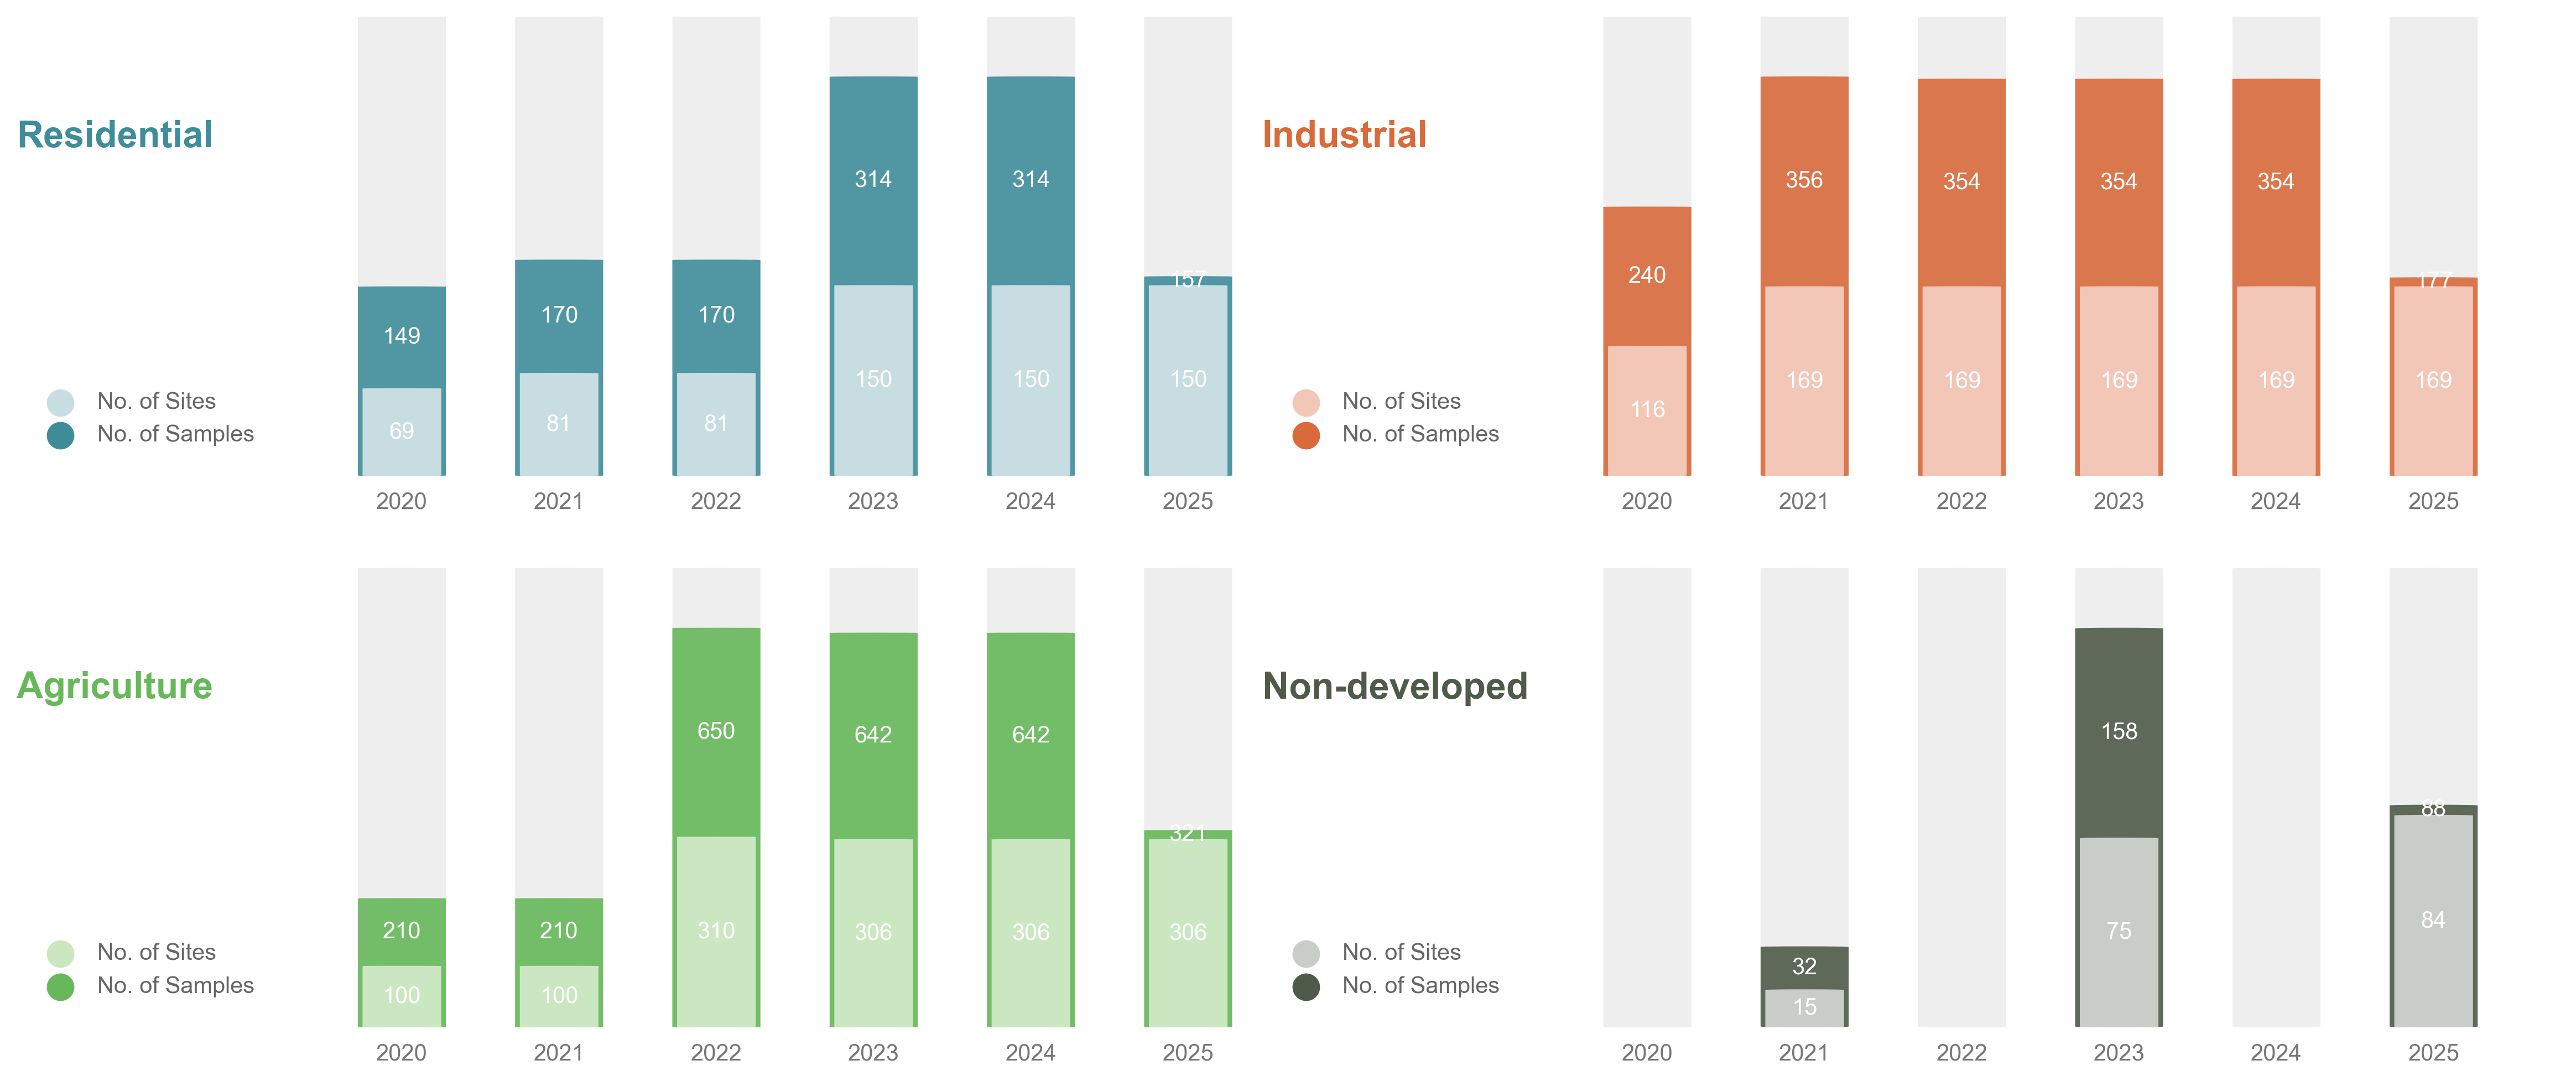

In [9]:
# -------------------------
# Plot (2x2)
# -------------------------
fig, axes = plt.subplots(
    2, 2,
    figsize=(16, 7),
    constrained_layout=False
)

plt.subplots_adjust(left=0.12, right=0.98, top=0.95, bottom=0.08)
axes = axes.ravel()

order = ["Residential", "Industrial", "Agriculture", "Non-developed"]

for ax, k in zip(axes, order):
    site_c, samp_c = colors[k]
    draw_panel(
        ax=ax,
        title=k,
        years=years,
        sites=data[k]["sites"],
        samples=data[k]["samples"],
        site_color=site_c,
        sample_color=samp_c,
    )

plt.show()
fig.savefig("../Result_hmq/Ch02_Figure1.svg", bbox_inches="tight", pad_inches=0.1)
fig.savefig("../Result_hmq/Ch02_Figure1.png", bbox_inches="tight", pad_inches=0.1)


In [10]:
# Optional: save figure
# fig.savefig("../Result_hmq/Figure2-1.png")